[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mbarbetti/lymphoma-classification/blob/master/2_data_visualization.ipynb)

# Data visualization

In [1]:
import numpy as np
import pandas as pd

import os
import pickle

data_dir  = "./data"
data_file = "db_mediastinalbulky_v1-cleaned.pkl"
file_path = os.path.join ( data_dir, data_file )

with open (file_path, "rb") as file:
  data = pickle.load (file)

data

,ID,lymphoma_type,age,SUVmin (SUV),SUVmean (SUV),SUVstd (SUV),SUVmax (SUV),MTV (# vx),MTV (mL),SMTV (mL/Kg),...,GLZLM_HGZE,GLZLM_SZLGE,GLZLM_SZHGE,GLZLM_LZLGE,GLZLM_LZHGE,GLZLM_GLNU,GLZLM_ZLNU,GLZLM_ZP,TimePosition,zLocation[onlyFor2DROI]
0,1.0,1.0,36.0,2.5,5.95,2.18,12.82,24331.0,1557.18,18.76,...,377.4491,0.0025,208.7742,2.1323,407155.3603,211.2121,1345.5094,0.1817,0.0,-1.0
1,2.0,1.0,35.0,2.5,4.33,1.11,7.83,3254.0,208.26,4.17,...,194.0813,0.0035,95.3844,3.4090,185833.9785,39.0861,106.3206,0.1285,0.0,-1.0
2,3.0,1.0,27.0,2.5,4.57,1.97,11.38,6738.0,431.23,5.32,...,339.1068,0.0026,198.1833,3.9477,40949.5723,82.2402,492.3309,0.2391,0.0,-1.0
3,4.0,1.0,36.0,2.5,3.84,1.64,12.06,653.0,41.79,0.52,...,289.1174,0.0033,193.0966,0.6668,5710.5962,14.3427,73.1221,0.3262,0.0,-1.0
4,5.0,1.0,42.0,2.5,5.78,2.25,16.47,17554.0,1123.46,14.40,...,429.8158,0.0024,251.6929,0.3021,25161.7506,217.9916,1672.9068,0.2969,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,123.0,3.0,21.0,2.5,8.93,3.54,18.49,27226.0,1742.46,24.89,...,787.8173,0.0018,486.4406,0.1669,210780.9675,241.4447,3465.8584,0.3363,0.0,-1.0
115,124.0,3.0,22.0,2.5,10.88,6.15,30.59,21713.0,1389.63,14.78,...,1375.5712,0.0015,1025.3920,0.1435,597450.1698,206.6405,5706.6437,0.5339,0.0,-1.0
116,126.0,3.0,41.0,2.5,10.11,4.73,26.22,21031.0,1345.98,23.61,...,1229.0217,0.0014,835.0950,0.2932,38312.4978,192.6683,4335.4394,0.4659,0.0,-1.0
117,127.0,3.0,39.0,2.5,5.81,2.27,12.27,1953.0,124.99,1.92,...,388.3105,0.0028,246.2483,0.0482,6264.5731,39.4886,340.2580,0.4485,0.0,-1.0


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from utils import plot_histos

VERBOSE = False

## Lymphoma types

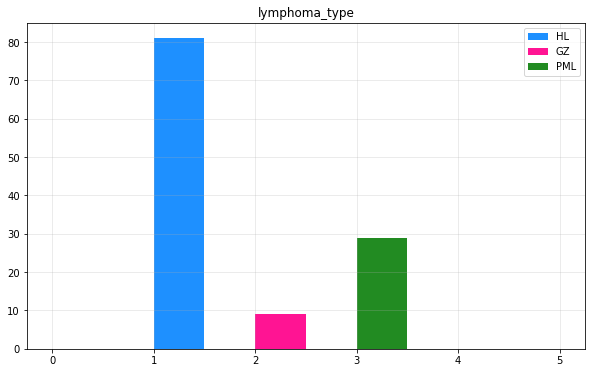

In [3]:
labels = ["HL", "GZ", "PML"]
colors = ["dodgerblue", "deeppink", "forestgreen"]

lym_types = data["lymphoma_type"]
x_1 = data[lym_types==1]["lymphoma_type"]
x_2 = data[lym_types==2]["lymphoma_type"]
x_3 = data[lym_types==3]["lymphoma_type"]

plt.figure (figsize = (10,6))
plt.title ("lymphoma_type", fontsize = 12)
plt.hist ([x_1, x_2, x_3], range = (0,5), bins = 10, stacked = True, color = colors, label = labels)
plt.grid (True, alpha = 0.3)
plt.legend (loc = "upper right", fontsize = 10)

plt.show()

## Age

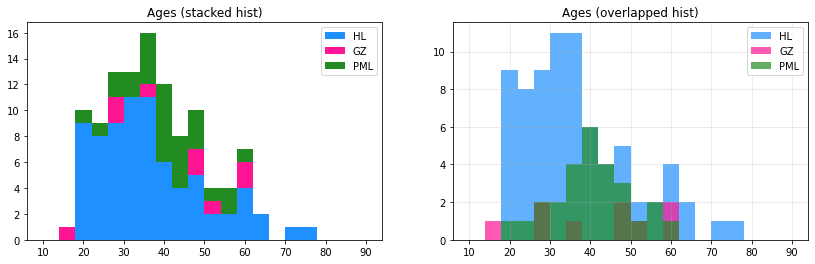

In [4]:
x_1 = data[lym_types==1]["age"]
x_2 = data[lym_types==2]["age"]
x_3 = data[lym_types==3]["age"]

fig, ax = plt.subplots (1, 2, figsize = (14,4))
plt.subplots_adjust (wspace = 0.2)

ax[0] . set_title ("Ages (stacked hist)", fontsize = 12)
ax[0] . hist ([x_1, x_2, x_3], range = (10, 90), bins = 20, stacked = True, color = colors, label = labels)
ax[0] . legend (loc = "upper right", fontsize = 10)

ax[1] . set_title ("Ages (overlapped hist)", fontsize = 12)
ax[1] . hist (x_1, range = (10, 90), bins = 20, alpha = 0.7, color = "dodgerblue" , label = "HL")
ax[1] . hist (x_2, range = (10, 90), bins = 20, alpha = 0.7, color = "deeppink"   , label = "GZ")
ax[1] . hist (x_3, range = (10, 90), bins = 20, alpha = 0.7, color = "forestgreen", label = "PML")
ax[1] . grid (True, alpha = 0.3)
ax[1] . legend (loc = "upper right", fontsize = 10)

plt.show()

## Other variables

### First variables

- strong correlations to `MTV (# vx)` detected
  - `MTV (mL)` --> 1.000
  - `MTV (# vx) TOT` --> 0.995
  - `MTV (mL) TOT` --> 0.995
  - `SMTV (mL/Kg)` --> 0.950
  - `TLG (SUV*mL) TOT` --> 0.934
  - `TLG (SUV*mL)` --> 0.934
  - `STLG (SUV*mL/Kg)` --> 0.894
  - `STLG (SUV*mL/Kg) TOT` --> 0.893
- strong and medium correlations to `SUVmean` detected
  - `SUVstd (SUV)` --> 0.965
  - `SUVmax (SUV)` --> 0.878
  - `MTV (# vx)` --> 0.518
- histograms for non-correlated variables plotted
  - `SUVmin (SUV)`
  - `SUVmean (SUV)`
  - `MTV (# vx)`
  - `SMTV (mL/Kg) TOT`
- variables with strong correlations dropped
  - `SUVstd (SUV)`
  - `SUVmax (SUV)`
  - `MTV (mL)`
  - `SMTV (mL/Kg)`
  - `TLG (SUV*mL)`
  - `STLG (SUV*mL/Kg)`
  - `MTV (# vx) TOT`
  - `MTV (mL) TOT`
  - `TLG (SUV*mL) TOT`
  - `STLG (SUV*mL/Kg) TOT`



In [5]:
corr_first_vars_1 = [
    'MTV (# vx)', 'MTV (mL)', 'SMTV (mL/Kg)', 'TLG (SUV*mL)', 'STLG (SUV*mL/Kg)', 
    'MTV (# vx) TOT', 'MTV (mL) TOT', 'TLG (SUV*mL) TOT', 'STLG (SUV*mL/Kg) TOT'
                    ]

corr_matrix_first_1 = data[corr_first_vars_1].corr()

if VERBOSE:
    _ = scatter_matrix ( data[corr_first_vars_1], figsize = (10,10) )

In [6]:
corr_matrix_first_1["MTV (# vx)"] . sort_values ( ascending = False )

MTV (# vx)              1.000000
MTV (mL)                1.000000
MTV (# vx) TOT          0.995278
MTV (mL) TOT            0.995215
SMTV (mL/Kg)            0.950055
TLG (SUV*mL) TOT        0.934409
TLG (SUV*mL)            0.934275
STLG (SUV*mL/Kg)        0.893573
STLG (SUV*mL/Kg) TOT    0.892823
Name: MTV (# vx), dtype: float64

In [7]:
corr_first_vars_2 = ['SUVmin (SUV)', 'SUVmean (SUV)', 'SUVstd (SUV)', 'SUVmax (SUV)', 'MTV (# vx)', 'SMTV (mL/Kg) TOT']

corr_matrix_first_2 = data[corr_first_vars_2].corr()

if VERBOSE:
    _ = scatter_matrix ( data[corr_first_vars_2], figsize = (10,10) )

In [8]:
corr_matrix_first_2["SUVmean (SUV)"] . sort_values ( ascending = False )

SUVmean (SUV)       1.000000
SUVstd (SUV)        0.965079
SUVmax (SUV)        0.878093
MTV (# vx)          0.518434
SUVmin (SUV)        0.206772
SMTV (mL/Kg) TOT   -0.036247
Name: SUVmean (SUV), dtype: float64

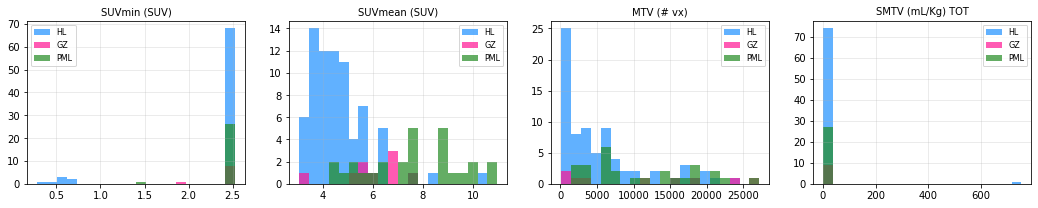

In [9]:
first_vars = ['SUVmin (SUV)', 'SUVmean (SUV)', 'MTV (# vx)', 'SMTV (mL/Kg) TOT']

plot_histos ( data, first_vars, n_rows = 1, n_cols = 4, plot_style = "overlapped", figsize = (18,3), legend_on_left = [0] )

In [10]:
cols_to_drop = [
    'SUVstd (SUV)', 'SUVmax (SUV)', 'MTV (mL)', 'SMTV (mL/Kg)', 'TLG (SUV*mL)', 'STLG (SUV*mL/Kg)',
    'MTV (# vx) TOT', 'MTV (mL) TOT', 'TLG (SUV*mL) TOT', 'STLG (SUV*mL/Kg) TOT'
               ]

redu_data = data . copy()
redu_data . drop ( labels = cols_to_drop, axis = 1, inplace = True )
redu_data

,ID,lymphoma_type,age,SUVmin (SUV),SUVmean (SUV),MTV (# vx),SMTV (mL/Kg) TOT,CONVENTIONAL_SUVbwmin,CONVENTIONAL_SUVbwmean,CONVENTIONAL_SUVbwstd,...,GLZLM_HGZE,GLZLM_SZLGE,GLZLM_SZHGE,GLZLM_LZLGE,GLZLM_LZHGE,GLZLM_GLNU,GLZLM_ZLNU,GLZLM_ZP,TimePosition,zLocation[onlyFor2DROI]
0,1.0,1.0,36.0,2.5,5.95,24331.0,18.84,2.5019,5.9155,2.1728,...,377.4491,0.0025,208.7742,2.1323,407155.3603,211.2121,1345.5094,0.1817,0.0,-1.0
1,2.0,1.0,35.0,2.5,4.33,3254.0,4.43,2.5005,4.3251,1.1112,...,194.0813,0.0035,95.3844,3.4090,185833.9785,39.0861,106.3206,0.1285,0.0,-1.0
2,3.0,1.0,27.0,2.5,4.57,6738.0,6.25,2.5001,4.5744,1.9667,...,339.1068,0.0026,198.1833,3.9477,40949.5723,82.2402,492.3309,0.2391,0.0,-1.0
3,4.0,1.0,36.0,2.5,3.84,653.0,2.95,2.5005,3.8428,1.6397,...,289.1174,0.0033,193.0966,0.6668,5710.5962,14.3427,73.1221,0.3262,0.0,-1.0
4,5.0,1.0,42.0,2.5,5.78,17554.0,14.40,2.5000,5.7819,2.2466,...,429.8158,0.0024,251.6929,0.3021,25161.7506,217.9916,1672.9068,0.2969,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,123.0,3.0,21.0,2.5,8.93,27226.0,25.09,2.5021,8.9252,3.5421,...,787.8173,0.0018,486.4406,0.1669,210780.9675,241.4447,3465.8584,0.3363,0.0,-1.0
115,124.0,3.0,22.0,2.5,10.88,21713.0,14.78,2.5005,11.1283,6.1127,...,1375.5712,0.0015,1025.3920,0.1435,597450.1698,206.6405,5706.6437,0.5339,0.0,-1.0
116,126.0,3.0,41.0,2.5,10.11,21031.0,23.61,2.5019,10.2559,4.7077,...,1229.0217,0.0014,835.0950,0.2932,38312.4978,192.6683,4335.4394,0.4659,0.0,-1.0
117,127.0,3.0,39.0,2.5,5.81,1953.0,1.92,2.5006,5.8053,2.2726,...,388.3105,0.0028,246.2483,0.0482,6264.5731,39.4886,340.2580,0.4485,0.0,-1.0


### Conventional variables

- strong and medium correlations to `CONVENTIONAL_SUVbwmean` detected
  - `CONVENTIONAL_SUVbwQ3` --> 0.996
  - `CONVENTIONAL_SUVbwQ2` --> 0.983
  - `CONVENTIONAL_SUVbwstd` --> 0.959
  - `CONVENTIONAL_SUVbwQ1` --> 0.923
  - `CONVENTIONAL_SUVbwpeakSphere1mL(value only for PET or NM)` --> 0.893
  - `CONVENTIONAL_SUVbwpeakSphere0,5mL(value only for PET or NM)` --> 0.887
  - `CONVENTIONAL_SUVbwmax` --> 0.872
  - `CONVENTIONAL_TLG(mL)[onlyForPETorNM]` --> 0.674
- histograms for non-correlated variables plotted
  - `CONVENTIONAL_SUVbwmin`
  - `CONVENTIONAL_SUVbwmean`
  - `CONVENTIONAL_SUVbwSkewness`
  - `CONVENTIONAL_SUVbwKurtosis`
  - `CONVENTIONAL_SUVbwExcessKurtosis`
  - `CONVENTIONAL_SUVbwpeakSphere0,5mL:discretized volume sought`
  - `CONVENTIONAL_SUVbwpeakSphere1mL:discretized volume sought`
  - `CONVENTIONAL_TLG(mL)[onlyForPETorNM]`
- variables with no dicriminant power detected
  - `CONVENTIONAL_SUVbwpeakSphere0,5mL:discretized volume sought`
  - `CONVENTIONAL_SUVbwpeakSphere1mL:discretized volume sought`
- variables with strong correlations and without discriminant power dropped
  - `CONVENTIONAL_SUVbwstd`
  - `CONVENTIONAL_SUVbwmax`
  - `CONVENTIONAL_SUVbwQ1`
  - `CONVENTIONAL_SUVbwQ2`
  - `CONVENTIONAL_SUVbwQ3`
  - `CONVENTIONAL_SUVbwpeakSphere0,5mL:discretized volume sought`
  - `CONVENTIONAL_SUVbwpeakSphere0,5mL(value only for PET or NM)`
  - `CONVENTIONAL_SUVbwpeakSphere1mL:discretized volume sought`
  - `CONVENTIONAL_SUVbwpeakSphere1mL(value only for PET or NM)`

In [11]:
corr_conv_vars = [
    'CONVENTIONAL_SUVbwmean', 'CONVENTIONAL_SUVbwstd', 'CONVENTIONAL_SUVbwmax', 'CONVENTIONAL_SUVbwQ1',
    'CONVENTIONAL_SUVbwQ2', 'CONVENTIONAL_SUVbwQ3', 'CONVENTIONAL_SUVbwpeakSphere0,5mL(value only for PET or NM)',
    'CONVENTIONAL_SUVbwpeakSphere1mL(value only for PET or NM)', 'CONVENTIONAL_TLG(mL)[onlyForPETorNM]'
                 ]

corr_matrix_conv = data[corr_conv_vars].corr()

if VERBOSE:
    _ = scatter_matrix ( data[corr_conv_vars], figsize = (10,10) )

In [12]:
corr_matrix_conv["CONVENTIONAL_SUVbwmean"] . sort_values ( ascending = False )

CONVENTIONAL_SUVbwmean                                         1.000000
CONVENTIONAL_SUVbwQ3                                           0.995940
CONVENTIONAL_SUVbwQ2                                           0.983085
CONVENTIONAL_SUVbwstd                                          0.959073
CONVENTIONAL_SUVbwQ1                                           0.922985
CONVENTIONAL_SUVbwpeakSphere1mL(value only for PET or NM)      0.892722
CONVENTIONAL_SUVbwpeakSphere0,5mL(value only for PET or NM)    0.887525
CONVENTIONAL_SUVbwmax                                          0.872253
CONVENTIONAL_TLG(mL)[onlyForPETorNM]                           0.674535
Name: CONVENTIONAL_SUVbwmean, dtype: float64

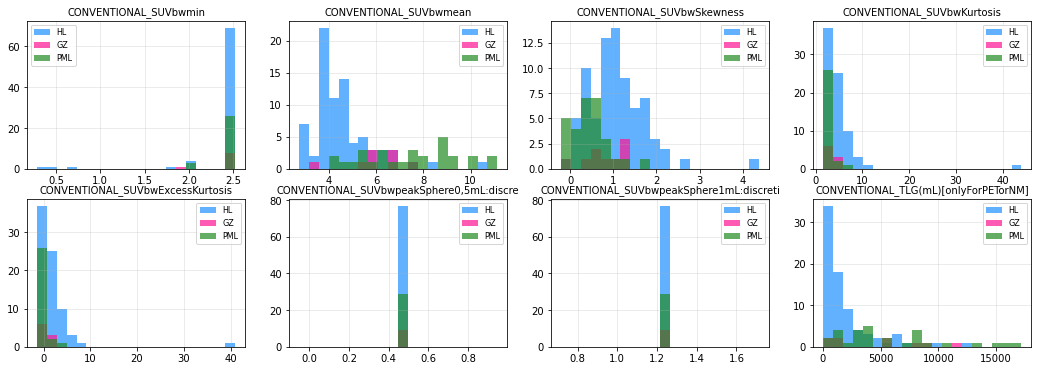

In [13]:
conv_vars = [
    'CONVENTIONAL_SUVbwmin', 'CONVENTIONAL_SUVbwmean', 'CONVENTIONAL_SUVbwSkewness', 'CONVENTIONAL_SUVbwKurtosis',
    'CONVENTIONAL_SUVbwExcessKurtosis', 'CONVENTIONAL_SUVbwpeakSphere0,5mL:discretized volume sought',
    'CONVENTIONAL_SUVbwpeakSphere1mL:discretized volume sought', 'CONVENTIONAL_TLG(mL)[onlyForPETorNM]'
            ]

plot_histos ( data, conv_vars, n_rows = 2, n_cols = 4, plot_style = "overlapped", figsize = (18,6), legend_on_left = [0] )

In [14]:
cols_to_drop = [
    'CONVENTIONAL_SUVbwstd', 'CONVENTIONAL_SUVbwmax', 'CONVENTIONAL_SUVbwQ1', 'CONVENTIONAL_SUVbwQ2', 'CONVENTIONAL_SUVbwQ3',
    'CONVENTIONAL_SUVbwpeakSphere0,5mL:discretized volume sought', 'CONVENTIONAL_SUVbwpeakSphere0,5mL(value only for PET or NM)',
    'CONVENTIONAL_SUVbwpeakSphere1mL:discretized volume sought', 'CONVENTIONAL_SUVbwpeakSphere1mL(value only for PET or NM)'
               ]

redu_data . drop ( labels = cols_to_drop, axis = 1, inplace = True )
redu_data

,ID,lymphoma_type,age,SUVmin (SUV),SUVmean (SUV),MTV (# vx),SMTV (mL/Kg) TOT,CONVENTIONAL_SUVbwmin,CONVENTIONAL_SUVbwmean,CONVENTIONAL_SUVbwSkewness,...,GLZLM_HGZE,GLZLM_SZLGE,GLZLM_SZHGE,GLZLM_LZLGE,GLZLM_LZHGE,GLZLM_GLNU,GLZLM_ZLNU,GLZLM_ZP,TimePosition,zLocation[onlyFor2DROI]
0,1.0,1.0,36.0,2.5,5.95,24331.0,18.84,2.5019,5.9155,0.3249,...,377.4491,0.0025,208.7742,2.1323,407155.3603,211.2121,1345.5094,0.1817,0.0,-1.0
1,2.0,1.0,35.0,2.5,4.33,3254.0,4.43,2.5005,4.3251,0.2354,...,194.0813,0.0035,95.3844,3.4090,185833.9785,39.0861,106.3206,0.1285,0.0,-1.0
2,3.0,1.0,27.0,2.5,4.57,6738.0,6.25,2.5001,4.5744,0.9606,...,339.1068,0.0026,198.1833,3.9477,40949.5723,82.2402,492.3309,0.2391,0.0,-1.0
3,4.0,1.0,36.0,2.5,3.84,653.0,2.95,2.5005,3.8428,1.9610,...,289.1174,0.0033,193.0966,0.6668,5710.5962,14.3427,73.1221,0.3262,0.0,-1.0
4,5.0,1.0,42.0,2.5,5.78,17554.0,14.40,2.5000,5.7819,0.7511,...,429.8158,0.0024,251.6929,0.3021,25161.7506,217.9916,1672.9068,0.2969,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,123.0,3.0,21.0,2.5,8.93,27226.0,25.09,2.5021,8.9252,-0.2148,...,787.8173,0.0018,486.4406,0.1669,210780.9675,241.4447,3465.8584,0.3363,0.0,-1.0
115,124.0,3.0,22.0,2.5,10.88,21713.0,14.78,2.5005,11.1283,0.3107,...,1375.5712,0.0015,1025.3920,0.1435,597450.1698,206.6405,5706.6437,0.5339,0.0,-1.0
116,126.0,3.0,41.0,2.5,10.11,21031.0,23.61,2.5019,10.2559,0.0082,...,1229.0217,0.0014,835.0950,0.2932,38312.4978,192.6683,4335.4394,0.4659,0.0,-1.0
117,127.0,3.0,39.0,2.5,5.81,1953.0,1.92,2.5006,5.8053,0.3977,...,388.3105,0.0028,246.2483,0.0482,6264.5731,39.4886,340.2580,0.4485,0.0,-1.0


### Discretized variables

- strong correlations to `DISCRETIZED_SUVbwmean` detected
  - `DISCRETIZED_SUVbwQ3` --> 0.995
  - `DISCRETIZED_SUVbwQ2` --> 0.982
  - `DISCRETIZED_SUVbwstd` --> 0.958
  - `DISCRETIZED_SUVbwQ1` --> 0.919
  - `DISCRETIZED_HISTO_Entropy_log10` --> 0.894
  - `DISCRETIZED_HISTO_Entropy_log2` --> 0.894
  - `DISCRETIZED_SUVbwpeakSphere1mL(value only for PET or NM)` --> 0.877
  - `DISCRETIZED_SUVbwpeakSphere0,5mL(value only for PET or NM)` --> 0.864
  - `DISCRETIZED_SUVbwmax` --> 0.827
- strong correlations to `DISCRETIZED_SUVbwKurtosis` detected
  - `DISCRETIZED_SUVbwExcessKurtosis` --> 1.000
  - `DISCRETIZED_SUVbwSkewness` --> 0.795
- strong and medium correlations to `DISCRETIZED_HISTO_Kurtosis` detected
  - `DISCRETIZED_HISTO_ExcessKurtosis` --> 1.000
  - `DISCRETIZED_HISTO_Skewness` --> 0.934
  - `DISCRETIZED_HISTO_Energy[=Uniformity]` --> 0.807
  - `DISCRETIZED_SUVbwSkewness` --> 0.504
- histograms for non-correlated variables plotted
  - `DISCRETIZED_SUVbwmean`
  - `DISCRETIZED_SUVbwKurtosis`
  - `DISCRETIZED_SUVbwpeakSphere0,5mL:discretized volume sought`
  - `DISCRETIZED_SUVbwpeakSphere1mL:discretized volume sought`
  - `DISCRETIZED_TLG(mL)[onlyForPETorNM]`
  - `DISCRETIZED_HISTO_Kurtosis`
- variables with no dicriminant power detected
  - `DISCRETIZED_SUVbwpeakSphere0,5mL:discretized volume sought`
  - `DISCRETIZED_SUVbwpeakSphere1mL:discretized volume sought`
- variables with strong correlations and without discriminant power dropped
  - `DISCRETIZED_SUVbwstd`
  - `DISCRETIZED_SUVbwmax`
  - `DISCRETIZED_SUVbwQ1`
  - `DISCRETIZED_SUVbwQ2`
  - `DISCRETIZED_SUVbwQ3`
  - `DISCRETIZED_SUVbwSkewness`
  - `DISCRETIZED_SUVbwExcessKurtosis`
  - `DISCRETIZED_SUVbwpeakSphere0,5mL:discretized volume sought`
  - `DISCRETIZED_SUVbwpeakSphere0,5mL(value only for PET or NM)`
  - `DISCRETIZED_SUVbwpeakSphere1mL:discretized volume sought`
  - `DISCRETIZED_SUVbwpeakSphere1mL(value only for PET or NM)`
  - `DISCRETIZED_HISTO_Skewness`
  - `DISCRETIZED_HISTO_ExcessKurtosis`
  - `DISCRETIZED_HISTO_Entropy_log10`
  - `DISCRETIZED_HISTO_Entropy_log2`
  - `DISCRETIZED_HISTO_Energy[=Uniformity]`

In [15]:
corr_disc_vars_1 = [
    'DISCRETIZED_SUVbwmean', 'DISCRETIZED_SUVbwstd', 'DISCRETIZED_SUVbwmax', 'DISCRETIZED_SUVbwQ1', 'DISCRETIZED_SUVbwQ2',
    'DISCRETIZED_SUVbwQ3', 'DISCRETIZED_SUVbwpeakSphere0,5mL(value only for PET or NM)',
    'DISCRETIZED_SUVbwpeakSphere1mL(value only for PET or NM)', 'DISCRETIZED_HISTO_Entropy_log10', 'DISCRETIZED_HISTO_Entropy_log2'
                    ]

corr_matrix_disc_1 = data[corr_disc_vars_1].corr()

if VERBOSE:
    _ = scatter_matrix ( data[corr_disc_vars_1], figsize = (10,10) )

In [16]:
corr_matrix_disc_1["DISCRETIZED_SUVbwmean"] . sort_values ( ascending = False )

DISCRETIZED_SUVbwmean                                         1.000000
DISCRETIZED_SUVbwQ3                                           0.995023
DISCRETIZED_SUVbwQ2                                           0.982198
DISCRETIZED_SUVbwstd                                          0.958168
DISCRETIZED_SUVbwQ1                                           0.919066
DISCRETIZED_HISTO_Entropy_log10                               0.893596
DISCRETIZED_HISTO_Entropy_log2                                0.893595
DISCRETIZED_SUVbwpeakSphere1mL(value only for PET or NM)      0.876712
DISCRETIZED_SUVbwpeakSphere0,5mL(value only for PET or NM)    0.863702
DISCRETIZED_SUVbwmax                                          0.827257
Name: DISCRETIZED_SUVbwmean, dtype: float64

In [17]:
corr_disc_vars_2 = [
    'DISCRETIZED_SUVbwmean', 'DISCRETIZED_SUVbwSkewness', 'DISCRETIZED_SUVbwKurtosis', 'DISCRETIZED_SUVbwExcessKurtosis',
    'DISCRETIZED_TLG(mL)[onlyForPETorNM]', 'DISCRETIZED_HISTO_Skewness', 'DISCRETIZED_HISTO_Kurtosis',
    'DISCRETIZED_HISTO_ExcessKurtosis', 'DISCRETIZED_HISTO_Energy[=Uniformity]'
                    ]

corr_matrix_disc_2 = data[corr_disc_vars_2].corr()

if VERBOSE:
    _ = scatter_matrix ( data[corr_disc_vars_2], figsize = (10,10) )

In [18]:
corr_matrix_disc_2["DISCRETIZED_SUVbwKurtosis"] . sort_values ( ascending = False )

DISCRETIZED_SUVbwKurtosis                1.000000
DISCRETIZED_SUVbwExcessKurtosis          1.000000
DISCRETIZED_SUVbwSkewness                0.794709
DISCRETIZED_HISTO_Energy[=Uniformity]    0.373201
DISCRETIZED_HISTO_Skewness               0.366758
DISCRETIZED_HISTO_ExcessKurtosis         0.289327
DISCRETIZED_HISTO_Kurtosis               0.289327
DISCRETIZED_TLG(mL)[onlyForPETorNM]     -0.171885
DISCRETIZED_SUVbwmean                   -0.346172
Name: DISCRETIZED_SUVbwKurtosis, dtype: float64

In [19]:
corr_matrix_disc_2["DISCRETIZED_HISTO_Kurtosis"] . sort_values ( ascending = False )

DISCRETIZED_HISTO_Kurtosis               1.000000
DISCRETIZED_HISTO_ExcessKurtosis         1.000000
DISCRETIZED_HISTO_Skewness               0.933732
DISCRETIZED_HISTO_Energy[=Uniformity]    0.807273
DISCRETIZED_SUVbwSkewness                0.504007
DISCRETIZED_SUVbwKurtosis                0.289327
DISCRETIZED_SUVbwExcessKurtosis          0.289327
DISCRETIZED_TLG(mL)[onlyForPETorNM]     -0.301966
DISCRETIZED_SUVbwmean                   -0.420975
Name: DISCRETIZED_HISTO_Kurtosis, dtype: float64

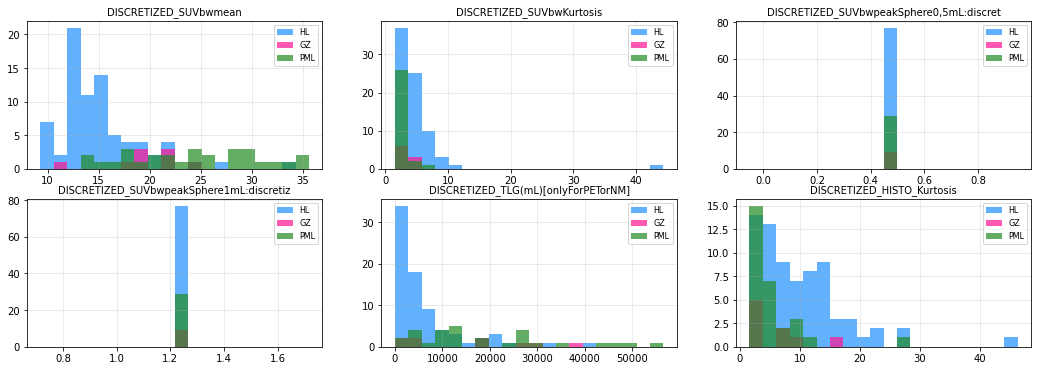

In [20]:
disc_vars = [
    'DISCRETIZED_SUVbwmean', 'DISCRETIZED_SUVbwKurtosis', 'DISCRETIZED_SUVbwpeakSphere0,5mL:discretized volume sought', 
    'DISCRETIZED_SUVbwpeakSphere1mL:discretized volume sought', 'DISCRETIZED_TLG(mL)[onlyForPETorNM]', 'DISCRETIZED_HISTO_Kurtosis',
            ]

plot_histos ( data, disc_vars, n_rows = 2, n_cols = 3, plot_style = "overlapped", figsize = (18,6), legend_on_left = [] )

In [21]:
cols_to_drop = [
    'DISCRETIZED_SUVbwstd', 'DISCRETIZED_SUVbwmax', 'DISCRETIZED_SUVbwQ1', 'DISCRETIZED_SUVbwQ2', 'DISCRETIZED_SUVbwQ3',
    'DISCRETIZED_SUVbwSkewness', 'DISCRETIZED_SUVbwExcessKurtosis', 'DISCRETIZED_SUVbwpeakSphere0,5mL:discretized volume sought',
    'DISCRETIZED_SUVbwpeakSphere0,5mL(value only for PET or NM)', 'DISCRETIZED_SUVbwpeakSphere1mL:discretized volume sought',
    'DISCRETIZED_SUVbwpeakSphere1mL(value only for PET or NM)', 'DISCRETIZED_HISTO_Skewness', 'DISCRETIZED_HISTO_ExcessKurtosis',
    'DISCRETIZED_HISTO_Entropy_log10', 'DISCRETIZED_HISTO_Entropy_log2', 'DISCRETIZED_HISTO_Energy[=Uniformity]'
               ]

redu_data . drop ( labels = cols_to_drop, axis = 1, inplace = True )
redu_data

,ID,lymphoma_type,age,SUVmin (SUV),SUVmean (SUV),MTV (# vx),SMTV (mL/Kg) TOT,CONVENTIONAL_SUVbwmin,CONVENTIONAL_SUVbwmean,CONVENTIONAL_SUVbwSkewness,...,GLZLM_HGZE,GLZLM_SZLGE,GLZLM_SZHGE,GLZLM_LZLGE,GLZLM_LZHGE,GLZLM_GLNU,GLZLM_ZLNU,GLZLM_ZP,TimePosition,zLocation[onlyFor2DROI]
0,1.0,1.0,36.0,2.5,5.95,24331.0,18.84,2.5019,5.9155,0.3249,...,377.4491,0.0025,208.7742,2.1323,407155.3603,211.2121,1345.5094,0.1817,0.0,-1.0
1,2.0,1.0,35.0,2.5,4.33,3254.0,4.43,2.5005,4.3251,0.2354,...,194.0813,0.0035,95.3844,3.4090,185833.9785,39.0861,106.3206,0.1285,0.0,-1.0
2,3.0,1.0,27.0,2.5,4.57,6738.0,6.25,2.5001,4.5744,0.9606,...,339.1068,0.0026,198.1833,3.9477,40949.5723,82.2402,492.3309,0.2391,0.0,-1.0
3,4.0,1.0,36.0,2.5,3.84,653.0,2.95,2.5005,3.8428,1.9610,...,289.1174,0.0033,193.0966,0.6668,5710.5962,14.3427,73.1221,0.3262,0.0,-1.0
4,5.0,1.0,42.0,2.5,5.78,17554.0,14.40,2.5000,5.7819,0.7511,...,429.8158,0.0024,251.6929,0.3021,25161.7506,217.9916,1672.9068,0.2969,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,123.0,3.0,21.0,2.5,8.93,27226.0,25.09,2.5021,8.9252,-0.2148,...,787.8173,0.0018,486.4406,0.1669,210780.9675,241.4447,3465.8584,0.3363,0.0,-1.0
115,124.0,3.0,22.0,2.5,10.88,21713.0,14.78,2.5005,11.1283,0.3107,...,1375.5712,0.0015,1025.3920,0.1435,597450.1698,206.6405,5706.6437,0.5339,0.0,-1.0
116,126.0,3.0,41.0,2.5,10.11,21031.0,23.61,2.5019,10.2559,0.0082,...,1229.0217,0.0014,835.0950,0.2932,38312.4978,192.6683,4335.4394,0.4659,0.0,-1.0
117,127.0,3.0,39.0,2.5,5.81,1953.0,1.92,2.5006,5.8053,0.3977,...,388.3105,0.0028,246.2483,0.0482,6264.5731,39.4886,340.2580,0.4485,0.0,-1.0


### Shape variables

- strong and medium correlations to `SHAPE_Volume(vx)` detected
  - `SHAPE_Volume(mL)` --> 1.000
  - `SHAPE_Surface(mm2)[onlyFor3DROI]` --> 0.925
  - `SHAPE_Compacity[onlyFor3DROI]` --> 0.738
- histograms for non-correlated variables plotted
  - `SHAPE_Volume(vx)`
  - `SHAPE_Sphericity[onlyFor3DROI])`
  - `SHAPE_Compacity[onlyFor3DROI]`
- variables with strong correlations dropped
  - `SHAPE_Volume(mL)`
  - `SHAPE_Surface(mm2)[onlyFor3DROI]`

In [22]:
corr_shape_vars = [
    'SHAPE_Volume(mL)', 'SHAPE_Volume(vx)', 'SHAPE_Sphericity[onlyFor3DROI])', 
    'SHAPE_Surface(mm2)[onlyFor3DROI]', 'SHAPE_Compacity[onlyFor3DROI]'
                  ]

corr_matrix_shape = data[corr_shape_vars].corr()

if VERBOSE:
    _ = scatter_matrix ( data[corr_shape_vars], figsize = (10,10) )

In [23]:
corr_matrix_shape["SHAPE_Volume(vx)"] . sort_values ( ascending = False )

SHAPE_Volume(mL)                    1.000000
SHAPE_Volume(vx)                    1.000000
SHAPE_Surface(mm2)[onlyFor3DROI]    0.924900
SHAPE_Compacity[onlyFor3DROI]       0.737584
SHAPE_Sphericity[onlyFor3DROI])    -0.222041
Name: SHAPE_Volume(vx), dtype: float64

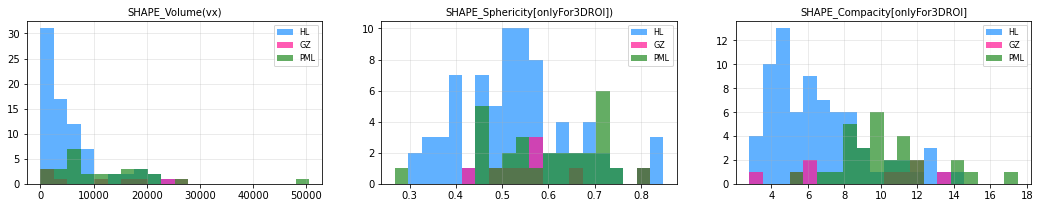

In [24]:
shape_vars = ['SHAPE_Volume(vx)', 'SHAPE_Sphericity[onlyFor3DROI])', 'SHAPE_Compacity[onlyFor3DROI]']

plot_histos ( data, shape_vars, n_rows = 1, n_cols = 3, plot_style = "overlapped", figsize = (18,3), legend_on_left = [] )

In [25]:
cols_to_drop = ['SHAPE_Volume(mL)', 'SHAPE_Surface(mm2)[onlyFor3DROI]']

redu_data . drop ( labels = cols_to_drop, axis = 1, inplace = True )
redu_data

,ID,lymphoma_type,age,SUVmin (SUV),SUVmean (SUV),MTV (# vx),SMTV (mL/Kg) TOT,CONVENTIONAL_SUVbwmin,CONVENTIONAL_SUVbwmean,CONVENTIONAL_SUVbwSkewness,...,GLZLM_HGZE,GLZLM_SZLGE,GLZLM_SZHGE,GLZLM_LZLGE,GLZLM_LZHGE,GLZLM_GLNU,GLZLM_ZLNU,GLZLM_ZP,TimePosition,zLocation[onlyFor2DROI]
0,1.0,1.0,36.0,2.5,5.95,24331.0,18.84,2.5019,5.9155,0.3249,...,377.4491,0.0025,208.7742,2.1323,407155.3603,211.2121,1345.5094,0.1817,0.0,-1.0
1,2.0,1.0,35.0,2.5,4.33,3254.0,4.43,2.5005,4.3251,0.2354,...,194.0813,0.0035,95.3844,3.4090,185833.9785,39.0861,106.3206,0.1285,0.0,-1.0
2,3.0,1.0,27.0,2.5,4.57,6738.0,6.25,2.5001,4.5744,0.9606,...,339.1068,0.0026,198.1833,3.9477,40949.5723,82.2402,492.3309,0.2391,0.0,-1.0
3,4.0,1.0,36.0,2.5,3.84,653.0,2.95,2.5005,3.8428,1.9610,...,289.1174,0.0033,193.0966,0.6668,5710.5962,14.3427,73.1221,0.3262,0.0,-1.0
4,5.0,1.0,42.0,2.5,5.78,17554.0,14.40,2.5000,5.7819,0.7511,...,429.8158,0.0024,251.6929,0.3021,25161.7506,217.9916,1672.9068,0.2969,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,123.0,3.0,21.0,2.5,8.93,27226.0,25.09,2.5021,8.9252,-0.2148,...,787.8173,0.0018,486.4406,0.1669,210780.9675,241.4447,3465.8584,0.3363,0.0,-1.0
115,124.0,3.0,22.0,2.5,10.88,21713.0,14.78,2.5005,11.1283,0.3107,...,1375.5712,0.0015,1025.3920,0.1435,597450.1698,206.6405,5706.6437,0.5339,0.0,-1.0
116,126.0,3.0,41.0,2.5,10.11,21031.0,23.61,2.5019,10.2559,0.0082,...,1229.0217,0.0014,835.0950,0.2932,38312.4978,192.6683,4335.4394,0.4659,0.0,-1.0
117,127.0,3.0,39.0,2.5,5.81,1953.0,1.92,2.5006,5.8053,0.3977,...,388.3105,0.0028,246.2483,0.0482,6264.5731,39.4886,340.2580,0.4485,0.0,-1.0


### Params variables

- histograms for non-correlated variables plotted
  - `PARAMS_DistanceOfNeighbours`
  - `PARAMS_NumberOfGreyLevels`
  - `PARAMS_BinSize`
  - `PARAMS_ZSpatialResampling:discretized volume sought`
  - `PARAMS_YSpatialResampling(mL)[onlyForPETorNM]`
  - `PARAMS_XSpatialResampling`
- variables with no dicriminant power detected
  - `PARAMS_DistanceOfNeighbours`
  - `PARAMS_NumberOfGreyLevels`
  - `PARAMS_BinSize`
  - `PARAMS_ZSpatialResampling:discretized volume sought`
  - `PARAMS_YSpatialResampling(mL)[onlyForPETorNM]`
  - `PARAMS_XSpatialResampling`
- variables without discriminant power dropped
  - `PARAMS_DistanceOfNeighbours`
  - `PARAMS_NumberOfGreyLevels`
  - `PARAMS_BinSize`
  - `PARAMS_ZSpatialResampling:discretized volume sought`
  - `PARAMS_YSpatialResampling(mL)[onlyForPETorNM]`
  - `PARAMS_XSpatialResampling`

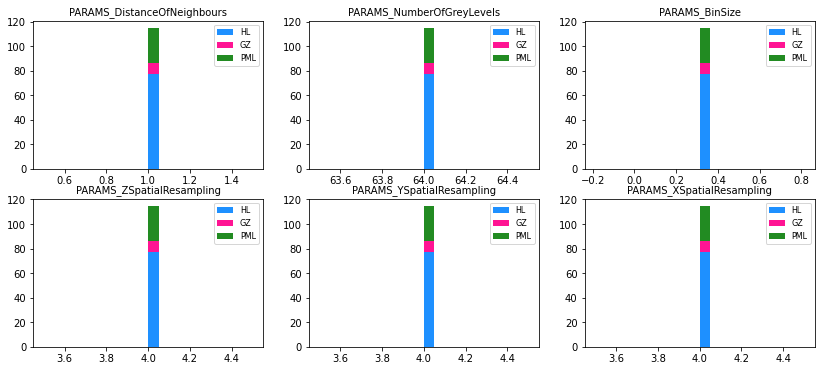

In [26]:
params_vars = [
    'PARAMS_DistanceOfNeighbours', 'PARAMS_NumberOfGreyLevels', 'PARAMS_BinSize',
    'PARAMS_ZSpatialResampling', 'PARAMS_YSpatialResampling', 'PARAMS_XSpatialResampling'
              ]

plot_histos ( data, params_vars, n_rows = 2, n_cols = 3, plot_style = "stacked", figsize = (14,6), legend_on_left = [] )

In [27]:
redu_data . drop ( labels = params_vars, axis = 1, inplace = True )
redu_data

,ID,lymphoma_type,age,SUVmin (SUV),SUVmean (SUV),MTV (# vx),SMTV (mL/Kg) TOT,CONVENTIONAL_SUVbwmin,CONVENTIONAL_SUVbwmean,CONVENTIONAL_SUVbwSkewness,...,GLZLM_HGZE,GLZLM_SZLGE,GLZLM_SZHGE,GLZLM_LZLGE,GLZLM_LZHGE,GLZLM_GLNU,GLZLM_ZLNU,GLZLM_ZP,TimePosition,zLocation[onlyFor2DROI]
0,1.0,1.0,36.0,2.5,5.95,24331.0,18.84,2.5019,5.9155,0.3249,...,377.4491,0.0025,208.7742,2.1323,407155.3603,211.2121,1345.5094,0.1817,0.0,-1.0
1,2.0,1.0,35.0,2.5,4.33,3254.0,4.43,2.5005,4.3251,0.2354,...,194.0813,0.0035,95.3844,3.4090,185833.9785,39.0861,106.3206,0.1285,0.0,-1.0
2,3.0,1.0,27.0,2.5,4.57,6738.0,6.25,2.5001,4.5744,0.9606,...,339.1068,0.0026,198.1833,3.9477,40949.5723,82.2402,492.3309,0.2391,0.0,-1.0
3,4.0,1.0,36.0,2.5,3.84,653.0,2.95,2.5005,3.8428,1.9610,...,289.1174,0.0033,193.0966,0.6668,5710.5962,14.3427,73.1221,0.3262,0.0,-1.0
4,5.0,1.0,42.0,2.5,5.78,17554.0,14.40,2.5000,5.7819,0.7511,...,429.8158,0.0024,251.6929,0.3021,25161.7506,217.9916,1672.9068,0.2969,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,123.0,3.0,21.0,2.5,8.93,27226.0,25.09,2.5021,8.9252,-0.2148,...,787.8173,0.0018,486.4406,0.1669,210780.9675,241.4447,3465.8584,0.3363,0.0,-1.0
115,124.0,3.0,22.0,2.5,10.88,21713.0,14.78,2.5005,11.1283,0.3107,...,1375.5712,0.0015,1025.3920,0.1435,597450.1698,206.6405,5706.6437,0.5339,0.0,-1.0
116,126.0,3.0,41.0,2.5,10.11,21031.0,23.61,2.5019,10.2559,0.0082,...,1229.0217,0.0014,835.0950,0.2932,38312.4978,192.6683,4335.4394,0.4659,0.0,-1.0
117,127.0,3.0,39.0,2.5,5.81,1953.0,1.92,2.5006,5.8053,0.3977,...,388.3105,0.0028,246.2483,0.0482,6264.5731,39.4886,340.2580,0.4485,0.0,-1.0


### GLCM variables

- strong correlations to `GLCM_Homogeneity[=InverseDifference]` detected
  - `GLCM_Energy[=AngularSecondMoment]` --> 0.805
  - `GLCM_Contrast[=Variance]` --> -0.836
  - `GLCM_Entropy_log2[=JointEntropy]` --> -0.905
  - `GLCM_Entropy_log10` --> -0.905
  - `GLCM_Dissimilarity` --> -0.928
- histograms for non-correlated variables plotted
  - `GLCM_Homogeneity[=InverseDifference]`
  - `GLCM_Correlation`
- variables with strong correlations dropped
  - `GLCM_Energy[=AngularSecondMoment]`
  - `GLCM_Contrast[=Variance]`
  - `GLCM_Entropy_log2[=JointEntropy]`
  - `GLCM_Entropy_log10`
  - `GLCM_Dissimilarity`

In [28]:
corr_glcm_vars = [
    'GLCM_Homogeneity[=InverseDifference]', 'GLCM_Energy[=AngularSecondMoment]', 'GLCM_Contrast[=Variance]',
    'GLCM_Correlation', 'GLCM_Entropy_log10', 'GLCM_Entropy_log2[=JointEntropy]', 'GLCM_Dissimilarity'
                    ]

corr_matrix_glcm = data[corr_glcm_vars].corr()

if VERBOSE:
    _ = scatter_matrix ( data[corr_glcm_vars], figsize = (10,10) )

In [29]:
corr_matrix_glcm["GLCM_Homogeneity[=InverseDifference]"] . sort_values ( ascending = False )

GLCM_Homogeneity[=InverseDifference]    1.000000
GLCM_Energy[=AngularSecondMoment]       0.804846
GLCM_Correlation                       -0.291982
GLCM_Contrast[=Variance]               -0.836363
GLCM_Entropy_log2[=JointEntropy]       -0.905272
GLCM_Entropy_log10                     -0.905272
GLCM_Dissimilarity                     -0.927661
Name: GLCM_Homogeneity[=InverseDifference], dtype: float64

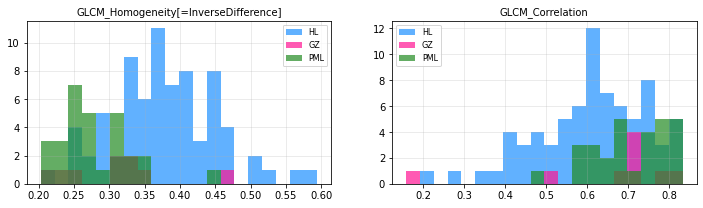

In [30]:
glcm_vars = ['GLCM_Homogeneity[=InverseDifference]', 'GLCM_Correlation']

plot_histos ( data, glcm_vars, n_rows = 1, n_cols = 2, plot_style = "overlapped", figsize = (12,3), legend_on_left = [1] )

In [31]:
cols_to_drop = [
    'GLCM_Energy[=AngularSecondMoment]', 'GLCM_Contrast[=Variance]', 'GLCM_Entropy_log2[=JointEntropy]',
    'GLCM_Entropy_log10', 'GLCM_Dissimilarity'
               ]

redu_data . drop ( labels = cols_to_drop, axis = 1, inplace = True )
redu_data

,ID,lymphoma_type,age,SUVmin (SUV),SUVmean (SUV),MTV (# vx),SMTV (mL/Kg) TOT,CONVENTIONAL_SUVbwmin,CONVENTIONAL_SUVbwmean,CONVENTIONAL_SUVbwSkewness,...,GLZLM_HGZE,GLZLM_SZLGE,GLZLM_SZHGE,GLZLM_LZLGE,GLZLM_LZHGE,GLZLM_GLNU,GLZLM_ZLNU,GLZLM_ZP,TimePosition,zLocation[onlyFor2DROI]
0,1.0,1.0,36.0,2.5,5.95,24331.0,18.84,2.5019,5.9155,0.3249,...,377.4491,0.0025,208.7742,2.1323,407155.3603,211.2121,1345.5094,0.1817,0.0,-1.0
1,2.0,1.0,35.0,2.5,4.33,3254.0,4.43,2.5005,4.3251,0.2354,...,194.0813,0.0035,95.3844,3.4090,185833.9785,39.0861,106.3206,0.1285,0.0,-1.0
2,3.0,1.0,27.0,2.5,4.57,6738.0,6.25,2.5001,4.5744,0.9606,...,339.1068,0.0026,198.1833,3.9477,40949.5723,82.2402,492.3309,0.2391,0.0,-1.0
3,4.0,1.0,36.0,2.5,3.84,653.0,2.95,2.5005,3.8428,1.9610,...,289.1174,0.0033,193.0966,0.6668,5710.5962,14.3427,73.1221,0.3262,0.0,-1.0
4,5.0,1.0,42.0,2.5,5.78,17554.0,14.40,2.5000,5.7819,0.7511,...,429.8158,0.0024,251.6929,0.3021,25161.7506,217.9916,1672.9068,0.2969,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,123.0,3.0,21.0,2.5,8.93,27226.0,25.09,2.5021,8.9252,-0.2148,...,787.8173,0.0018,486.4406,0.1669,210780.9675,241.4447,3465.8584,0.3363,0.0,-1.0
115,124.0,3.0,22.0,2.5,10.88,21713.0,14.78,2.5005,11.1283,0.3107,...,1375.5712,0.0015,1025.3920,0.1435,597450.1698,206.6405,5706.6437,0.5339,0.0,-1.0
116,126.0,3.0,41.0,2.5,10.11,21031.0,23.61,2.5019,10.2559,0.0082,...,1229.0217,0.0014,835.0950,0.2932,38312.4978,192.6683,4335.4394,0.4659,0.0,-1.0
117,127.0,3.0,39.0,2.5,5.81,1953.0,1.92,2.5006,5.8053,0.3977,...,388.3105,0.0028,246.2483,0.0482,6264.5731,39.4886,340.2580,0.4485,0.0,-1.0


### GLRLM variables

- strong and medium correlations to `GLRLM_SRE` detected
  - `GLRLM_RP` --> 0.997
  - `GLRLM_SRHGE` --> 0.604
  - `GLRLM_SRLGE` --> -0.634
  - `GLRLM_LGRE` --> -0.684
  - `GLRLM_LRLGE` --> -0.804
  - `GLRLM_LRE` --> -0.986
- strong and medium correlations to `GLRLM_LRHGE` detected
  - `GLRLM_HGRE` --> 0.971
  - `GLRLM_SRHGE` --> 0.964
  - `GLRLM_LRLGE` --> -0.627
  - `GLRLM_LGRE` --> -0.716
  - `GLRLM_SRLGE` --> -0.733
- histograms for non-correlated variables plotted
  - `GLRLM_SRE`
  - `GLRLM_LGRE`
  - `GLRLM_SRLGE`
  - `GLRLM_LRHGE`
  - `GLRLM_GLNU`
  - `GLRLM_RLNU`
- variables with strong correlations dropped
  - `GLRLM_LRE`
  - `GLRLM_HGRE`
  - `GLRLM_SRHGE`
  - `GLRLM_LRLGE`
  - `GLRLM_RP`

In [32]:
corr_glrlm_vars = [
    'GLRLM_SRE', 'GLRLM_LRE', 'GLRLM_LGRE', 'GLRLM_HGRE', 'GLRLM_SRLGE', 
    'GLRLM_SRHGE', 'GLRLM_LRLGE', 'GLRLM_LRHGE', 'GLRLM_RP'
                  ]

corr_matrix_glrlm = data[corr_glrlm_vars].corr()

if VERBOSE:
    _ = scatter_matrix ( data[corr_glrlm_vars], figsize = (10,10) )

In [33]:
corr_matrix_glrlm["GLRLM_SRE"] . sort_values ( ascending = False )

GLRLM_SRE      1.000000
GLRLM_RP       0.996623
GLRLM_SRHGE    0.604504
GLRLM_HGRE     0.590006
GLRLM_LRHGE    0.484435
GLRLM_SRLGE   -0.634425
GLRLM_LGRE    -0.684374
GLRLM_LRLGE   -0.803673
GLRLM_LRE     -0.986007
Name: GLRLM_SRE, dtype: float64

In [34]:
corr_matrix_glrlm["GLRLM_LRHGE"] . sort_values ( ascending = False )

GLRLM_LRHGE    1.000000
GLRLM_HGRE     0.970767
GLRLM_SRHGE    0.963567
GLRLM_SRE      0.484435
GLRLM_RP       0.437821
GLRLM_LRE     -0.372078
GLRLM_LRLGE   -0.626746
GLRLM_LGRE    -0.716006
GLRLM_SRLGE   -0.733130
Name: GLRLM_LRHGE, dtype: float64

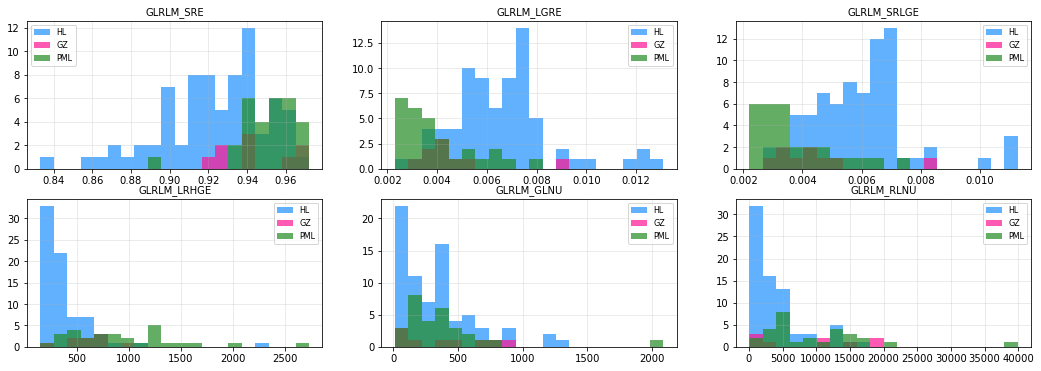

In [35]:
glrlm_vars = ['GLRLM_SRE', 'GLRLM_LGRE', 'GLRLM_SRLGE', 'GLRLM_LRHGE', 'GLRLM_GLNU', 'GLRLM_RLNU']

plot_histos ( data, glrlm_vars, n_rows = 2, n_cols = 3, plot_style = "overlapped", figsize = (18,6), legend_on_left = [0] ) 

In [36]:
cols_to_drop = ['GLRLM_LRE', 'GLRLM_HGRE', 'GLRLM_SRHGE', 'GLRLM_LRLGE', 'GLRLM_RP']

redu_data . drop ( labels = cols_to_drop, axis = 1, inplace = True )
redu_data

,ID,lymphoma_type,age,SUVmin (SUV),SUVmean (SUV),MTV (# vx),SMTV (mL/Kg) TOT,CONVENTIONAL_SUVbwmin,CONVENTIONAL_SUVbwmean,CONVENTIONAL_SUVbwSkewness,...,GLZLM_HGZE,GLZLM_SZLGE,GLZLM_SZHGE,GLZLM_LZLGE,GLZLM_LZHGE,GLZLM_GLNU,GLZLM_ZLNU,GLZLM_ZP,TimePosition,zLocation[onlyFor2DROI]
0,1.0,1.0,36.0,2.5,5.95,24331.0,18.84,2.5019,5.9155,0.3249,...,377.4491,0.0025,208.7742,2.1323,407155.3603,211.2121,1345.5094,0.1817,0.0,-1.0
1,2.0,1.0,35.0,2.5,4.33,3254.0,4.43,2.5005,4.3251,0.2354,...,194.0813,0.0035,95.3844,3.4090,185833.9785,39.0861,106.3206,0.1285,0.0,-1.0
2,3.0,1.0,27.0,2.5,4.57,6738.0,6.25,2.5001,4.5744,0.9606,...,339.1068,0.0026,198.1833,3.9477,40949.5723,82.2402,492.3309,0.2391,0.0,-1.0
3,4.0,1.0,36.0,2.5,3.84,653.0,2.95,2.5005,3.8428,1.9610,...,289.1174,0.0033,193.0966,0.6668,5710.5962,14.3427,73.1221,0.3262,0.0,-1.0
4,5.0,1.0,42.0,2.5,5.78,17554.0,14.40,2.5000,5.7819,0.7511,...,429.8158,0.0024,251.6929,0.3021,25161.7506,217.9916,1672.9068,0.2969,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,123.0,3.0,21.0,2.5,8.93,27226.0,25.09,2.5021,8.9252,-0.2148,...,787.8173,0.0018,486.4406,0.1669,210780.9675,241.4447,3465.8584,0.3363,0.0,-1.0
115,124.0,3.0,22.0,2.5,10.88,21713.0,14.78,2.5005,11.1283,0.3107,...,1375.5712,0.0015,1025.3920,0.1435,597450.1698,206.6405,5706.6437,0.5339,0.0,-1.0
116,126.0,3.0,41.0,2.5,10.11,21031.0,23.61,2.5019,10.2559,0.0082,...,1229.0217,0.0014,835.0950,0.2932,38312.4978,192.6683,4335.4394,0.4659,0.0,-1.0
117,127.0,3.0,39.0,2.5,5.81,1953.0,1.92,2.5006,5.8053,0.3977,...,388.3105,0.0028,246.2483,0.0482,6264.5731,39.4886,340.2580,0.4485,0.0,-1.0


### NGLDM variables

- histograms for non-correlated variables plotted
  - `NGLDM_Coarseness`
  - `NGLDM_Contrast`
  - `NGLDM_Busyness`

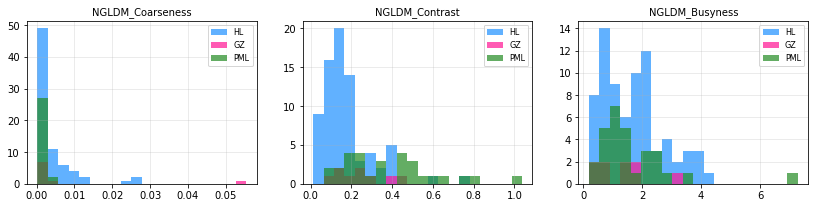

In [37]:
ngldm_vars = ['NGLDM_Coarseness', 'NGLDM_Contrast', 'NGLDM_Busyness']

plot_histos ( data, ngldm_vars, n_rows = 1, n_cols = 3, plot_style = "overlapped", figsize = (14,3), legend_on_left = [] )

### GLZLM variables

- strong correlations to `GLZLM_HGZE` detected
  - `GLZLM_SZHGE` --> 0.996
  - `GLZLM_SZLGE` --> -0.756
  - `GLZLM_LGZE` --> -0.815
- histograms for non-correlated variables plotted
  - `GLZLM_SZE`
  - `GLZLM_LZE`
  - `GLZLM_HGZE`
  - `GLZLM_LZLGE`
  - `GLZLM_LZHGE`
  - `GLZLM_GLNU`
  - `GLZLM_ZLNU`
  - `GLZLM_ZP`
- variables with no dicriminant power detected
  - `GLZLM_GLNU`
  - `GLZLM_ZP`
- variables with strong correlations and without discriminant power dropped
  - `GLZLM_SZHGE`
  - `GLZLM_SZLGE`
  - `GLZLM_LGZE`
  - `GLZLM_GLNU`
  - `GLZLM_ZP`

In [38]:
corr_glzlm_vars = ['GLZLM_LGZE', 'GLZLM_HGZE', 'GLZLM_SZLGE', 'GLZLM_SZHGE', 'GLZLM_ZLNU']

corr_matrix_glzlm = data[corr_glzlm_vars].corr()

if VERBOSE:
    _ = scatter_matrix ( data[corr_glzlm_vars], figsize = (10,10) )

In [39]:
corr_matrix_glzlm["GLZLM_HGZE"] . sort_values ( ascending = False )

GLZLM_HGZE     1.000000
GLZLM_SZHGE    0.996499
GLZLM_ZLNU     0.592554
GLZLM_SZLGE   -0.755837
GLZLM_LGZE    -0.814634
Name: GLZLM_HGZE, dtype: float64

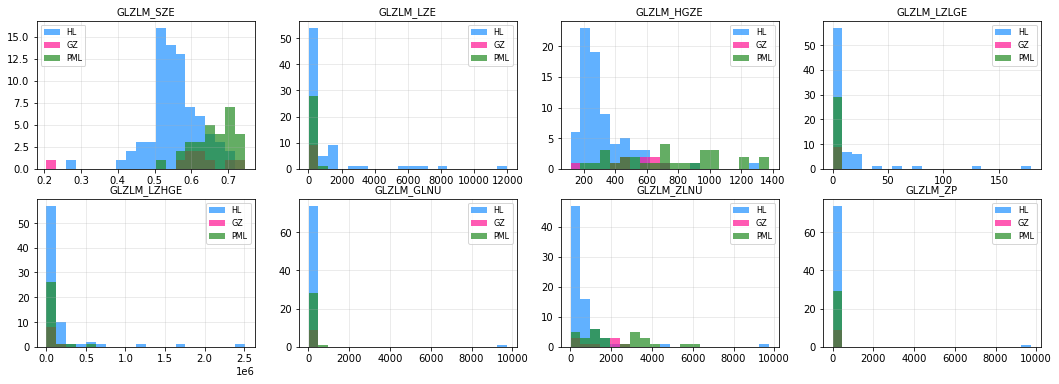

In [40]:
glzlm_vars = ['GLZLM_SZE', 'GLZLM_LZE', 'GLZLM_HGZE', 'GLZLM_LZLGE', 'GLZLM_LZHGE', 'GLZLM_GLNU', 'GLZLM_ZLNU', 'GLZLM_ZP']

plot_histos ( data, glzlm_vars, n_rows = 2, n_cols = 4, plot_style = "overlapped", figsize = (18,6), legend_on_left = [0] )

In [41]:
cols_to_drop = ['GLZLM_SZHGE', 'GLZLM_SZLGE', 'GLZLM_LGZE', 'GLZLM_GLNU', 'GLZLM_ZP']

redu_data . drop ( labels = cols_to_drop, axis = 1, inplace = True )
redu_data

,ID,lymphoma_type,age,SUVmin (SUV),SUVmean (SUV),MTV (# vx),SMTV (mL/Kg) TOT,CONVENTIONAL_SUVbwmin,CONVENTIONAL_SUVbwmean,CONVENTIONAL_SUVbwSkewness,...,NGLDM_Contrast,NGLDM_Busyness,GLZLM_SZE,GLZLM_LZE,GLZLM_HGZE,GLZLM_LZLGE,GLZLM_LZHGE,GLZLM_ZLNU,TimePosition,zLocation[onlyFor2DROI]
0,1.0,1.0,36.0,2.5,5.95,24331.0,18.84,2.5019,5.9155,0.3249,...,0.1386,3.9414,0.5578,754.7287,377.4491,2.1323,407155.3603,1345.5094,0.0,-1.0
1,2.0,1.0,35.0,2.5,4.33,3254.0,4.43,2.5005,4.3251,0.2354,...,0.1244,2.1960,0.5127,748.0431,194.0813,3.4090,185833.9785,106.3206,0.0,-1.0
2,3.0,1.0,27.0,2.5,4.57,6738.0,6.25,2.5001,4.5744,0.9606,...,0.1783,3.0396,0.5701,369.9559,339.1068,3.9477,40949.5723,492.3309,0.0,-1.0
3,4.0,1.0,36.0,2.5,3.84,653.0,2.95,2.5005,3.8428,1.9610,...,0.1630,0.4612,0.6014,58.6901,289.1174,0.6668,5710.5962,73.1221,0.0,-1.0
4,5.0,1.0,42.0,2.5,5.78,17554.0,14.40,2.5000,5.7819,0.7511,...,0.1176,2.0209,0.5845,68.9751,429.8158,0.3021,25161.7506,1672.9068,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,123.0,3.0,21.0,2.5,8.93,27226.0,25.09,2.5021,8.9252,-0.2148,...,0.2273,1.2439,0.6382,149.7982,787.8173,0.1669,210780.9675,3465.8584,0.0,-1.0
115,124.0,3.0,22.0,2.5,10.88,21713.0,14.78,2.5005,11.1283,0.3107,...,1.0372,2.3054,0.7454,156.6509,1375.5712,0.1435,597450.1698,5706.6437,0.0,-1.0
116,126.0,3.0,41.0,2.5,10.11,21031.0,23.61,2.5019,10.2559,0.0082,...,0.5341,1.3293,0.7026,42.7801,1229.0217,0.2932,38312.4978,4335.4394,0.0,-1.0
117,127.0,3.0,39.0,2.5,5.81,1953.0,1.92,2.5006,5.8053,0.3977,...,0.3237,0.8501,0.6461,12.9715,388.3105,0.0482,6264.5731,340.2580,0.0,-1.0


### Last variables

- histograms for non-correlated variables plotted
  - `TimePosition`
  - `zLocation[onlyFor2DROI]`
- variables with no dicriminant power detected
  - `TimePosition`
  - `zLocation[onlyFor2DROI]`
- variables without discriminant power dropped
  - `TimePosition`
  - `zLocation[onlyFor2DROI]`

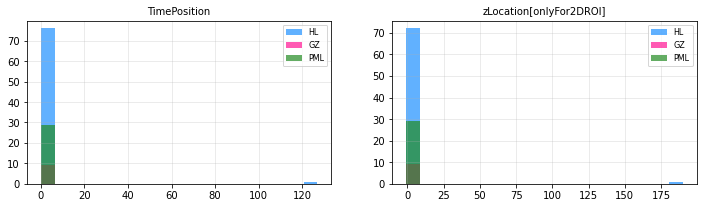

In [42]:
last_vars = ['TimePosition', 'zLocation[onlyFor2DROI]']

plot_histos ( data, last_vars, n_rows = 1, n_cols = 2, plot_style = "overlapped", figsize = (12,3), legend_on_left = [] )

In [43]:
redu_data . drop ( labels = last_vars, axis = 1, inplace = True )
redu_data

,ID,lymphoma_type,age,SUVmin (SUV),SUVmean (SUV),MTV (# vx),SMTV (mL/Kg) TOT,CONVENTIONAL_SUVbwmin,CONVENTIONAL_SUVbwmean,CONVENTIONAL_SUVbwSkewness,...,GLRLM_RLNU,NGLDM_Coarseness,NGLDM_Contrast,NGLDM_Busyness,GLZLM_SZE,GLZLM_LZE,GLZLM_HGZE,GLZLM_LZLGE,GLZLM_LZHGE,GLZLM_ZLNU
0,1.0,1.0,36.0,2.5,5.95,24331.0,18.84,2.5019,5.9155,0.3249,...,17831.2877,0.0006,0.1386,3.9414,0.5578,754.7287,377.4491,2.1323,407155.3603,1345.5094
1,2.0,1.0,35.0,2.5,4.33,3254.0,4.43,2.5005,4.3251,0.2354,...,2163.1233,0.0030,0.1244,2.1960,0.5127,748.0431,194.0813,3.4090,185833.9785,106.3206
2,3.0,1.0,27.0,2.5,4.57,6738.0,6.25,2.5001,4.5744,0.9606,...,4831.8309,0.0010,0.1783,3.0396,0.5701,369.9559,339.1068,3.9477,40949.5723,492.3309
3,4.0,1.0,36.0,2.5,3.84,653.0,2.95,2.5005,3.8428,1.9610,...,479.6011,0.0051,0.1630,0.4612,0.6014,58.6901,289.1174,0.6668,5710.5962,73.1221
4,5.0,1.0,42.0,2.5,5.78,17554.0,14.40,2.5000,5.7819,0.7511,...,13629.0648,0.0006,0.1176,2.0209,0.5845,68.9751,429.8158,0.3021,25161.7506,1672.9068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,123.0,3.0,21.0,2.5,8.93,27226.0,25.09,2.5021,8.9252,-0.2148,...,21505.4571,0.0006,0.2273,1.2439,0.6382,149.7982,787.8173,0.1669,210780.9675,3465.8584
115,124.0,3.0,22.0,2.5,10.88,21713.0,14.78,2.5005,11.1283,0.3107,...,16516.4718,0.0003,1.0372,2.3054,0.7454,156.6509,1375.5712,0.1435,597450.1698,5706.6437
116,126.0,3.0,41.0,2.5,10.11,21031.0,23.61,2.5019,10.2559,0.0082,...,16848.8804,0.0006,0.5341,1.3293,0.7026,42.7801,1229.0217,0.2932,38312.4978,4335.4394
117,127.0,3.0,39.0,2.5,5.81,1953.0,1.92,2.5006,5.8053,0.3977,...,1657.7526,0.0037,0.3237,0.8501,0.6461,12.9715,388.3105,0.0482,6264.5731,340.2580


## Further data filtering

- strong and medium correlations to `SUVmean (SUV)` detected
  - `GLZLM_HGZE` --> 0.968
  - `GLRLM_LRHGE` --> 0.942
  - `DISCRETIZED_SUVbwmean` --> 0.990
  - `CONVENTIONAL_SUVbwmean` --> -0.990
  - `NGLDM_Contrast` --> 0.842
  - `GLZLM_SZE` --> 0.782
  - `CONVENTIONAL_TLG(mL)[onlyForPETorNM]` --> 0.712
  - `SHAPE_Compacity[onlyFor3DROI]` --> 0.709
  - `DISCRETIZED_TLG(mL)[onlyForPETorNM]` --> 0.708
  - `GLRLM_SRE` --> 0.628
  - `GLCM_Homogeneity[=InverseDifference]` --> -0.778
  - `GLRLM_LGRE` --> -0.859
  - `GLRLM_SRLGE` --> -0.868
- strong and medium correlations to `MTV (# vx)` detected
  - `SHAPE_Volume(vx)` --> 0.992
  - `GLRLM_RLNU` --> 0.983
  - `DISCRETIZED_TLG(mL)[onlyForPETorNM]` --> 0.931
  - `CONVENTIONAL_TLG(mL)[onlyForPETorNM]` --> 0.928
  - `SHAPE_Compacity[onlyFor3DROI]` --> 0.832
  - `GLRLM_GLNU` --> 0.792
  - `GLCM_Correlation` --> 0.658
- strong correlations to `CONVENTIONAL_SUVbwKurtosis` detected
  - `CONVENTIONAL_SUVbwExcessKurtosis` --> 1.000
  - `DISCRETIZED_SUVbwKurtosis` --> 1.000
  - `CONVENTIONAL_SUVbwSkewness` --> 0.795
- variables with strong correlations dropped
  - `CONVENTIONAL_SUVbwmean`
  - `CONVENTIONAL_TLG(mL)[onlyForPETorNM]`
  - `CONVENTIONAL_SUVbwSkewness`
  - `CONVENTIONAL_SUVbwExcessKurtosis`
  - `DISCRETIZED_SUVbwmean`
  - `DISCRETIZED_TLG(mL)[onlyForPETorNM]`
  - `DISCRETIZED_SUVbwKurtosis`
  - `SHAPE_Volume(vx)`
  - `SHAPE_Compacity[onlyFor3DROI]`
  - `GLCM_Homogeneity[=InverseDifference]`
  - `GLRLM_LGRE`
  - `GLRLM_SRLGE`
  - `GLRLM_LRHGE`
  - `GLRLM_GLNU`
  - `GLRLM_RLNU`
  - `NGLDM_Contrast`
  - `GLZLM_SZE`
  - `GLZLM_HGZE`

In [44]:
corr_vars_1 = [
    'SUVmean (SUV)', 'MTV (# vx)', 'CONVENTIONAL_SUVbwmean', 'CONVENTIONAL_SUVbwKurtosis',
    'CONVENTIONAL_SUVbwExcessKurtosis', 'CONVENTIONAL_TLG(mL)[onlyForPETorNM]',
    'DISCRETIZED_SUVbwmean', 'DISCRETIZED_SUVbwKurtosis', 'DISCRETIZED_TLG(mL)[onlyForPETorNM]'
              ]

corr_matrix_1 = data[corr_vars_1].corr()

if VERBOSE:
    _ = scatter_matrix ( data[corr_vars_1], figsize = (10,10) )

In [45]:
corr_matrix_1["SUVmean (SUV)"] . sort_values ( ascending = False )

SUVmean (SUV)                           1.000000
DISCRETIZED_SUVbwmean                   0.990123
CONVENTIONAL_SUVbwmean                  0.990049
CONVENTIONAL_TLG(mL)[onlyForPETorNM]    0.711910
DISCRETIZED_TLG(mL)[onlyForPETorNM]     0.708427
MTV (# vx)                              0.518434
CONVENTIONAL_SUVbwKurtosis             -0.338140
CONVENTIONAL_SUVbwExcessKurtosis       -0.338140
DISCRETIZED_SUVbwKurtosis              -0.343952
Name: SUVmean (SUV), dtype: float64

In [46]:
corr_matrix_1["MTV (# vx)"] . sort_values ( ascending = False )

MTV (# vx)                              1.000000
DISCRETIZED_TLG(mL)[onlyForPETorNM]     0.931081
CONVENTIONAL_TLG(mL)[onlyForPETorNM]    0.927597
CONVENTIONAL_SUVbwmean                  0.519575
DISCRETIZED_SUVbwmean                   0.518624
SUVmean (SUV)                           0.518434
CONVENTIONAL_SUVbwKurtosis             -0.122868
CONVENTIONAL_SUVbwExcessKurtosis       -0.122868
DISCRETIZED_SUVbwKurtosis              -0.127770
Name: MTV (# vx), dtype: float64

In [47]:
corr_vars_2 = [
    'CONVENTIONAL_SUVbwSkewness', 'CONVENTIONAL_SUVbwKurtosis', 'CONVENTIONAL_SUVbwExcessKurtosis',
    'DISCRETIZED_SUVbwKurtosis', 'DISCRETIZED_HISTO_Kurtosis'
              ]

corr_matrix_2 = data[corr_vars_2].corr()

if VERBOSE:
    _ = scatter_matrix ( data[corr_vars_2], figsize = (10,10) )

In [48]:
corr_matrix_2["CONVENTIONAL_SUVbwKurtosis"] . sort_values ( ascending = False )

CONVENTIONAL_SUVbwKurtosis          1.000000
CONVENTIONAL_SUVbwExcessKurtosis    1.000000
DISCRETIZED_SUVbwKurtosis           0.999800
CONVENTIONAL_SUVbwSkewness          0.794753
DISCRETIZED_HISTO_Kurtosis          0.285230
Name: CONVENTIONAL_SUVbwKurtosis, dtype: float64

In [49]:
corr_vars_3 = [
    'SUVmean (SUV)', 'MTV (# vx)', 'SHAPE_Volume(vx)', 'SHAPE_Compacity[onlyFor3DROI]', 
    'GLCM_Homogeneity[=InverseDifference]', 'GLRLM_SRE', 'GLRLM_LGRE', 'GLRLM_SRLGE', 
    'GLRLM_LRHGE', 'GLRLM_GLNU', 'GLRLM_RLNU', 'NGLDM_Contrast', 'NGLDM_Busyness', 'GLZLM_HGZE',
              ]

corr_matrix_3 = data[corr_vars_3].corr()

if VERBOSE:
    _ = scatter_matrix ( data[corr_vars_3], figsize = (10,10) )

In [50]:
corr_matrix_3["SUVmean (SUV)"] . sort_values ( ascending = False )

SUVmean (SUV)                           1.000000
GLZLM_HGZE                              0.967798
GLRLM_LRHGE                             0.941910
NGLDM_Contrast                          0.842328
SHAPE_Compacity[onlyFor3DROI]           0.709252
GLRLM_SRE                               0.628434
GLRLM_RLNU                              0.580449
SHAPE_Volume(vx)                        0.518550
MTV (# vx)                              0.518434
GLRLM_GLNU                              0.027611
NGLDM_Busyness                         -0.063815
GLCM_Homogeneity[=InverseDifference]   -0.777792
GLRLM_LGRE                             -0.859244
GLRLM_SRLGE                            -0.867966
Name: SUVmean (SUV), dtype: float64

In [51]:
corr_matrix_3["MTV (# vx)"] . sort_values ( ascending = False )

MTV (# vx)                              1.000000
SHAPE_Volume(vx)                        0.991697
GLRLM_RLNU                              0.983508
SHAPE_Compacity[onlyFor3DROI]           0.832102
GLRLM_GLNU                              0.792452
NGLDM_Busyness                          0.545017
SUVmean (SUV)                           0.518434
GLRLM_LRHGE                             0.516175
GLZLM_HGZE                              0.479308
NGLDM_Contrast                          0.127196
GLRLM_SRE                               0.030978
GLCM_Homogeneity[=InverseDifference]   -0.182554
GLRLM_LGRE                             -0.538134
GLRLM_SRLGE                            -0.573392
Name: MTV (# vx), dtype: float64

In [52]:
corr_vars_4 = [
    'SUVmean (SUV)', 'MTV (# vx)', 'DISCRETIZED_HISTO_Kurtosis', 
    'GLCM_Correlation', 'GLRLM_SRE', 'GLZLM_SZE', 'GLZLM_ZLNU'
              ]

corr_matrix_4 = data[corr_vars_4].corr()

if VERBOSE:
    _ = scatter_matrix ( data[corr_vars_4], figsize = (10,10) )

In [53]:
corr_matrix_4["SUVmean (SUV)"] . sort_values ( ascending = False )

SUVmean (SUV)                 1.000000
GLZLM_SZE                     0.781917
GLRLM_SRE                     0.628434
GLZLM_ZLNU                    0.595394
GLCM_Correlation              0.559950
MTV (# vx)                    0.518434
DISCRETIZED_HISTO_Kurtosis   -0.354576
Name: SUVmean (SUV), dtype: float64

In [54]:
corr_matrix_4["GLZLM_ZLNU"] . sort_values ( ascending = False )

GLZLM_ZLNU                    1.000000
SUVmean (SUV)                 0.595394
MTV (# vx)                    0.584805
GLZLM_SZE                     0.421596
GLCM_Correlation              0.413820
GLRLM_SRE                     0.250399
DISCRETIZED_HISTO_Kurtosis   -0.226130
Name: GLZLM_ZLNU, dtype: float64

In [55]:
cols_to_drop = [
    'CONVENTIONAL_SUVbwmean', 'CONVENTIONAL_TLG(mL)[onlyForPETorNM]', 'CONVENTIONAL_SUVbwSkewness',
    'CONVENTIONAL_SUVbwExcessKurtosis', 'DISCRETIZED_SUVbwmean', 'DISCRETIZED_TLG(mL)[onlyForPETorNM]', 'DISCRETIZED_SUVbwKurtosis',
    'SHAPE_Volume(vx)', 'SHAPE_Compacity[onlyFor3DROI]', 'GLCM_Homogeneity[=InverseDifference]', 'GLRLM_LGRE', 
    'GLRLM_SRLGE', 'GLRLM_LRHGE', 'GLRLM_GLNU', 'GLRLM_RLNU', 'NGLDM_Contrast', 'GLZLM_SZE', 'GLZLM_HGZE',
               ]

redu_data . drop ( labels = cols_to_drop, axis = 1, inplace = True )
redu_data

,ID,lymphoma_type,age,SUVmin (SUV),SUVmean (SUV),MTV (# vx),SMTV (mL/Kg) TOT,CONVENTIONAL_SUVbwmin,CONVENTIONAL_SUVbwKurtosis,DISCRETIZED_HISTO_Kurtosis,SHAPE_Sphericity[onlyFor3DROI]),GLCM_Correlation,GLRLM_SRE,NGLDM_Coarseness,NGLDM_Busyness,GLZLM_LZE,GLZLM_LZLGE,GLZLM_LZHGE,GLZLM_ZLNU
0,1.0,1.0,36.0,2.5,5.95,24331.0,18.84,2.5019,2.1746,1.7122,0.5614,0.8241,0.9141,0.0006,3.9414,754.7287,2.1323,407155.3603,1345.5094
1,2.0,1.0,35.0,2.5,4.33,3254.0,4.43,2.5005,2.1950,4.2447,0.7320,0.6350,0.8990,0.0030,2.1960,748.0431,3.4090,185833.9785,106.3206
2,3.0,1.0,27.0,2.5,4.57,6738.0,6.25,2.5001,2.8616,14.8444,0.3950,0.7470,0.9181,0.0010,3.0396,369.9559,3.9477,40949.5723,492.3309
3,4.0,1.0,36.0,2.5,3.84,653.0,2.95,2.5005,7.0315,26.2316,0.4702,0.4957,0.9230,0.0051,0.4612,58.6901,0.6668,5710.5962,73.1221
4,5.0,1.0,42.0,2.5,5.78,17554.0,14.40,2.5000,3.4776,2.3475,0.5160,0.7092,0.9370,0.0006,2.0209,68.9751,0.3021,25161.7506,1672.9068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,123.0,3.0,21.0,2.5,8.93,27226.0,25.09,2.5021,1.9816,1.6092,0.7035,0.8157,0.9415,0.0006,1.2439,149.7982,0.1669,210780.9675,3465.8584
115,124.0,3.0,22.0,2.5,10.88,21713.0,14.78,2.5005,2.0061,26.7023,0.6157,0.7556,0.9465,0.0003,2.3054,156.6509,0.1435,597450.1698,5706.6437
116,126.0,3.0,41.0,2.5,10.11,21031.0,23.61,2.5019,2.1510,2.4036,0.6709,0.7630,0.9533,0.0006,1.3293,42.7801,0.2932,38312.4978,4335.4394
117,127.0,3.0,39.0,2.5,5.81,1953.0,1.92,2.5006,2.1612,2.4299,0.7240,0.5718,0.9590,0.0037,0.8501,12.9715,0.0482,6264.5731,340.2580


## Data export

In [56]:
exp_data_file = "db_mediastinalbulky_v2-reduced.pkl"
exp_file_path = os.path.join ( data_dir, exp_data_file )

redu_data . to_pickle ( exp_file_path )